# Market Segmentation

### This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

## Dataset
The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behaviorl variables.

**Variables of Dataset**  
**Balance**  
**Balance Frequency**  
**Purchases**  
**One-off Purchases**  
**Installment Purchases**  
**Cash Advance**  
**Purchases Frequency**  
**One-off Purchases Frequency**  
**Purchases Installments Frequency**  
**Cash Advance Frequency**  
**Cash Advance TRX**  
**Purchases TRX**  
**Credit Limit**  
**Payments**  
**Minimum Payments**  
**PRC Full payment**  
**Tenure**  
**Cluster**  

## **Objective :**
#### **This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups**.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [26]:
#load the data
customers = pd.read_csv('Customer Data.csv')

In [27]:
#view the first five rows of the data
customers.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [28]:
customers.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [29]:
#check columns information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [30]:
# drop irrelevant columns
customers = customers.drop(columns=['CUST_ID'],axis=1)

In [31]:
#check columns information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


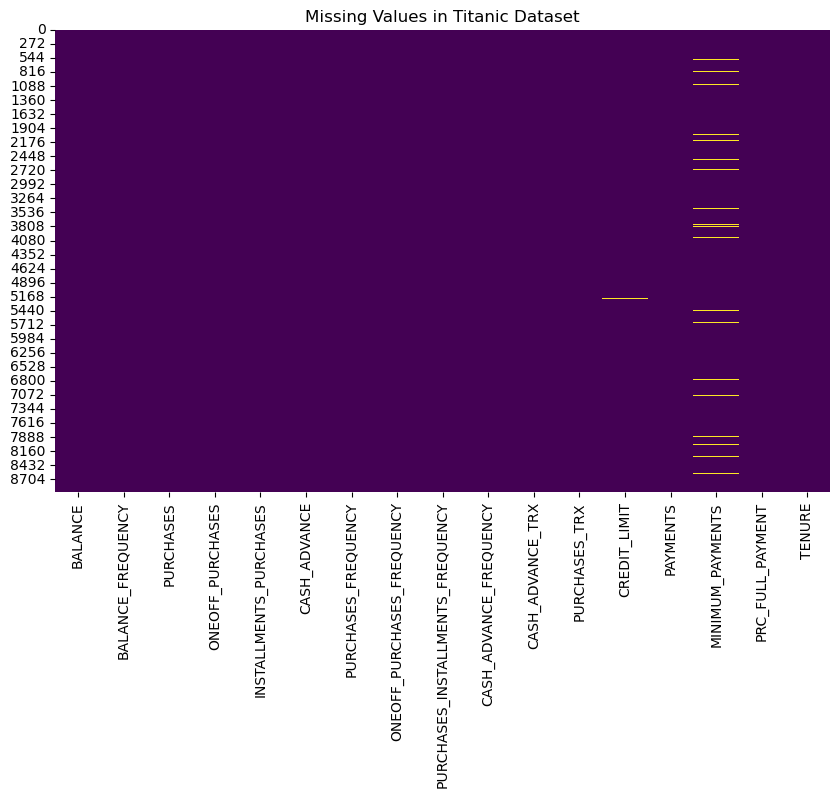

In [32]:
import seaborn as sns
# Check for missing values
missing_values = customers.isnull().sum()
print(missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

#### **Data Cleaning**
Handle missing values by imputing or dropping them as appropriate.

In [33]:
#checking duplicates
customers[customers.duplicated]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [34]:
# Fill missing values in 'Age' with the median age
#Inplace means apply it to the original 
customers['MINIMUM_PAYMENTS'].fillna(customers['MINIMUM_PAYMENTS'].mean(), inplace=True)

# Fill missing values in 'Embarked' with the most frequent value
customers['CREDIT_LIMIT'].fillna(customers['CREDIT_LIMIT'].mean(), inplace=True)

# Verify that there are no more missing values
print(customers.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [35]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [36]:
# Preprocess data
X = customers

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

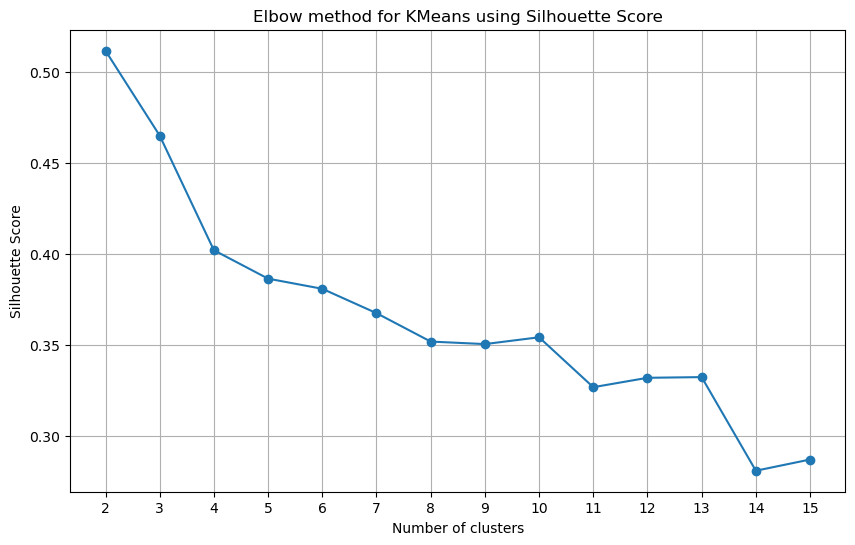

Optimal number of clusters: 2
KMeans Silhouette score: 0.5114773214237212


In [38]:
# Silhouette Score Calculation
silhouette_scores = []
cluster_range = range(2, 16)  # Use range from 2 to 15

for nr_c in cluster_range:  # Iterate over cluster_range
    kmeans = KMeans(n_clusters=nr_c, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, kmeans_labels))

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')  # Plot all silhouette scores
plt.title('Elbow method for KMeans using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 16, step=1))  # Adjust ticks for better visualization
plt.grid(True)
plt.show()

# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 as we started from 2 clusters
print("Optimal number of clusters:", optimal_clusters)

# KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X)

# Silhouette score for KMeans
kmeans_score = silhouette_score(X, kmeans_labels)
print("KMeans Silhouette score:", kmeans_score)


### Analysis Section

In [39]:
# Add cluster labels to the original data
X['Cluster'] = kmeans_labels

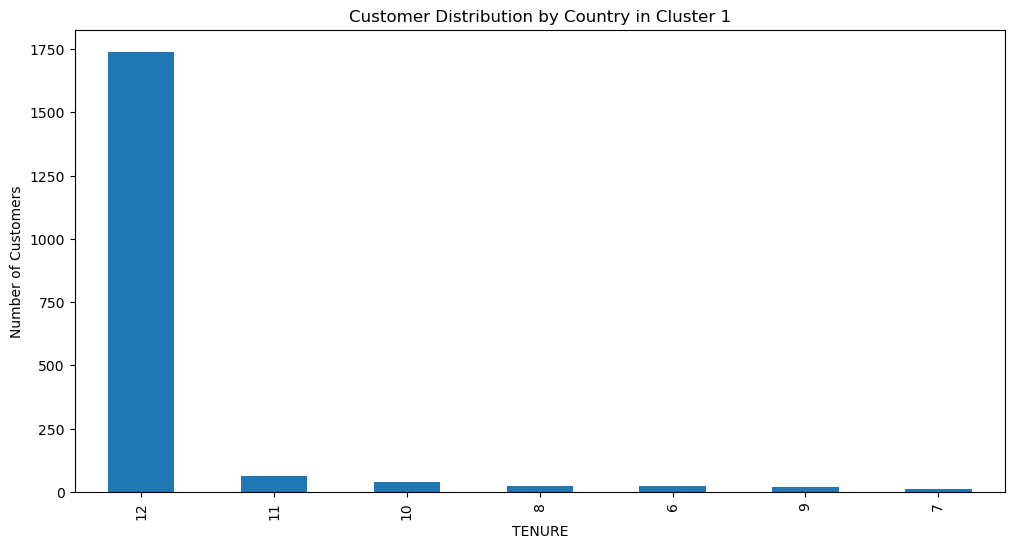

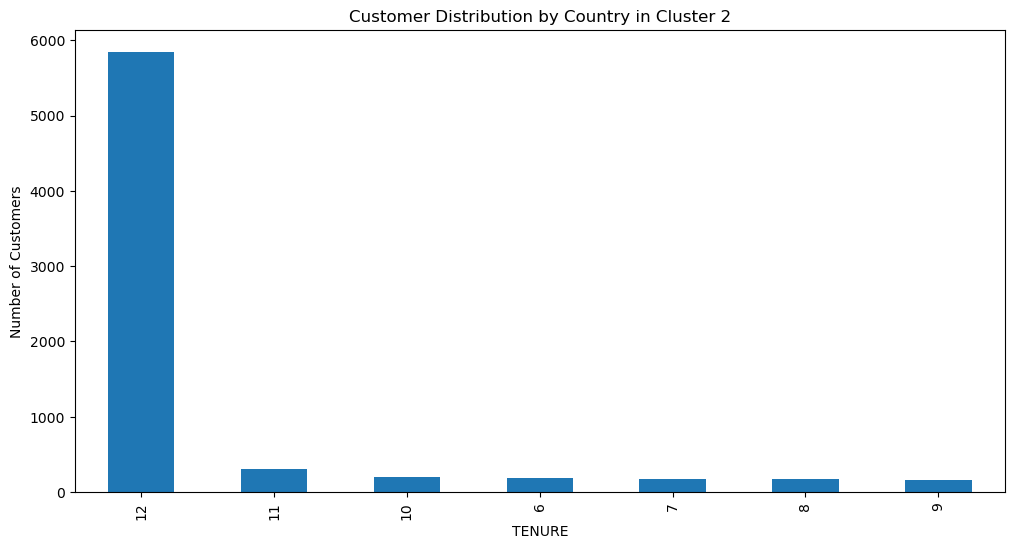

In [46]:
for cluster in range(optimal_clusters):
    cluster_data = customers[customers['Cluster'] == cluster]
    country_counts = cluster_data['TENURE'].value_counts()
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar')
    plt.title(f'Customer Distribution by Country in Cluster {cluster + 1}')
    plt.xlabel('TENURE')
    plt.ylabel('Number of Customers')
    plt.show()

In [41]:
# Use PCA for dimensionality reduction

# Apply PCA and keep the top 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-4326.383962,921.566874
1,4118.916723,-2432.846354
2,1497.907645,-1997.578680
3,1394.548540,-1488.743440
4,-3743.351881,757.342652
...,...,...
8945,-4208.357945,1122.443265
8946,-4123.924008,951.683795
8947,-4379.444208,911.504557
8948,-4791.117749,1032.540933


In [42]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_data)

# Add the cluster labels to the DataFrame
pca_df['cluster1'] = kmeans.labels_
pca_df['cluster1']

0       0
1       1
2       0
3       0
4       0
       ..
8945    0
8946    0
8947    0
8948    0
8949    0
Name: cluster1, Length: 8950, dtype: int32

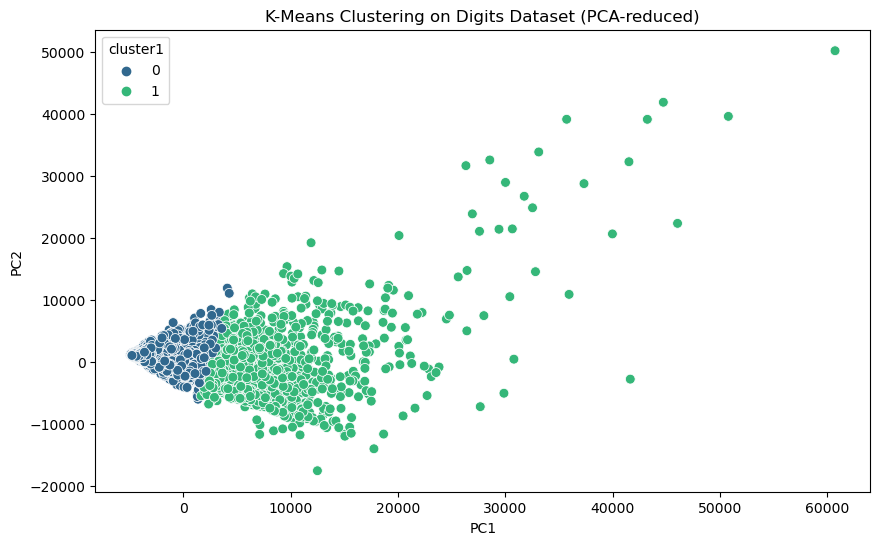

In [43]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster1', data=pca_df, palette='viridis', s=50)
plt.title('K-Means Clustering on Digits Dataset (PCA-reduced)')
plt.show()
